<a href="https://colab.research.google.com/github/ravichas/bifx-546/blob/main/Notebooks/Chapter05_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎓 Course Context

Prepared for BIFX-546 – Machine Learning for Bioinformatics

Instructor: Sarangan Ravichandran, Ph.D., PMP

# Statistics

* Mathematics/Techniques we use to understand data



# 📘 Attribution & Reading Reference

This notebook is based on concepts, structure and examples from,

Data Science from Scratch, 2nd Edition by Joel Grus,published by O'Reilly Media,Inc.

# Relevant Reading:

Data Science from Scratch, 2nd Edition — Chapter 5: [Statistics]

The material in this notebook has been **expanded with additional explanations,new examples, and code adaptations** to support instructional use and execution in a Google Colab Envinronment. Any additions, reformatting, or implementation detailss beyond the original text are the responsibility of the notebook author.

This notebook is intended for educational use only and does not replace the original book/code examples.

## Code

Portions of the vector and matrix code are adapted from Data Science from Scratch by Joel Grus (GitHub source: https://github.com/joelgrus/data-science-from-scratch).

The domain-specific examples—particularly the healthcare and genomics use cases—were created specifically for this class.”

# Get the Book Code and reproduce the examples

In [ ]:
# ==== Course setup: safe clone + cd + import path ====
import os
import sys

REPO_URL = "https://github.com/joelgrus/data-science-from-scratch.git"
REPO_DIR = "data-science-from-scratch"

# 1. If we're *anywhere inside* the repo, move to the parent directory first
cwd = os.getcwd()
if REPO_DIR in cwd.split(os.sep):
    parts = cwd.split(os.sep)
    # Walk up until we are at .../data-science-from-scratch
    while parts and parts[-1] != REPO_DIR:
        parts.pop()
    # Now go to the directory *above* the repo
    parent_dir = os.sep.join(parts[:-1]) or "/"
    os.chdir(parent_dir)
    print(f"Moved to parent directory: {os.getcwd()}")

# 2. Clone only if needed
if not os.path.exists(REPO_DIR):
    print("Cloning repo...")
    !git clone {REPO_URL}
else:
    print(f"{REPO_DIR} already exists — skipping clone.")

# 3. cd into the repo (this is where you'll live most of the time)
%cd {REPO_DIR}

# 4. Ensure the repo is importable (for scratch.linear_algebra, etc.)
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
    print("Added repo to sys.path")

Moved to parent directory: /content
data-science-from-scratch already exists — skipping clone.
/content/data-science-from-scratch


In [ ]:
from IPython.display import display, HTML

display(HTML("""
<script>
MathJax = {
  tex: { packages: {'[+]': ['ams']} },
  svg: { fontCache: 'global' }
};
</script>
"""))

# Start with Description of Data (EDA)

The key topics that we will discuss via coding are:
* Describing the data
* Correlation
* Simpson's paradox
* Correlation vs Causation

# Describing the Data

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

Let us say, we have access to the information on how many friends your members (imagine you are working for a Social App Company)

In [ ]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,
               13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,
               9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,
               7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1,1,1]


In [ ]:
len(num_friends)

204

# Visualization

Let us start with visualization.

In [ ]:
# data
friend_counts = Counter(num_friends)

In [ ]:
num_points = len(num_friends)               # 204
print(num_points)

assert num_points == 204

204


Text(0, 0.5, '# of people')

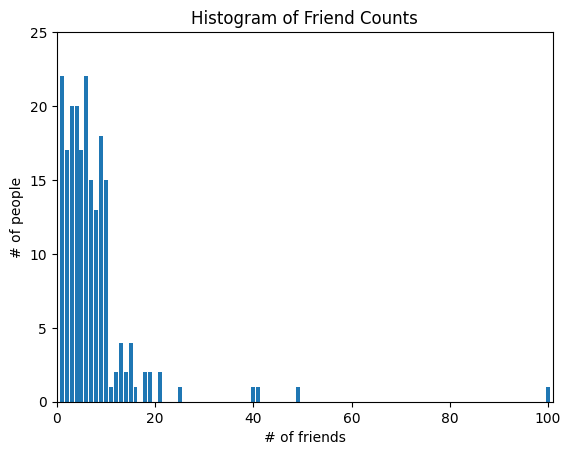

In [ ]:
# x and y data
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends

# figure related
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
# plt.show()

This chart is too difficult to be used in conversations or meetings. And in most cases, charts may be dense and it is better to start with some statistics.

In [ ]:
largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1

# Just checking
assert largest_value == 100
assert smallest_value == 1

In [ ]:
# Careful what commands we use
# import numpy as np
# np.sort(num_friends)

In [ ]:
sorted_values = sorted(num_friends)
print(sorted_values)
smallest_value = sorted_values[0]           # 1

second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49


assert smallest_value == 1
assert second_smallest_value == 1
assert second_largest_value == 49

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 12, 12, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 18, 18, 19, 19, 21, 21, 25, 40, 41, 49, 100.0]


# Central Tendencies

We need some information on where data is centered. Let us start with mean (or average)

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

In [ ]:
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)   # 7.333333


assert 7.3333 < mean(num_friends) < 7.3334

# Median

Unlike the mean, the median doesn't fully depend on every value in the dataset.

The underscores in the following functions indicate that these are "private" functions, as they're
intended to be called by our median function but not by other people
using our statistics library.

We create two functions and combine them later.

Here is the definition of Median:

$$
\text{Median} =
\begin{cases}
x_{\left(\frac{n+1}{2}\right)}, & \text{if } n \text{ is odd} \\[6pt]
\frac{1}{2}\left(x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2}+1\right)}\right),
& \text{if } n \text{ is even}
\end{cases}
$$

#  `//` Operator

floor division (or integer division) operator

## Examples

* 10 // 3  $\approx$ 3.33 -->  3
* -10 // 3 $\approx$ -3.33 --> -4 (rounded down to the nearest integer; which is more negative)
* 10 // 3.0  one operand is a float, so the result is a float --> 3.0
* 8 // 2 An exact division results in a integer --> 4

In [ ]:
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

# sort ; pick the middle #
assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2


# We now can compute median

In [ ]:
assert median(num_friends) == 6

# Mean vs Median

  * Mean follows the tail of the data
  * Mean is sensitive to outliers in the data
  * If the data has outliers, it is better to use median
    * ex house prices
  

# Mean

if one number increases by some small amount e,

```
x1 + x2 + (x3 + e) + ... +  xn
```
$$ \frac{1}{n} \sum_{i=1}^{n} x_i + \frac{e}{n} $$

$$ \text{Mean} + \frac{e}{n} $$

# Quantile: A generalization of Median

Median: 50th percentile

$$
Q_1 = x_{\left(0.25(n+1)\right)}
$$

$$Q_2 = \text{Median} $$


$$Q_3 = x_{\left(0.75(n+1)\right)}$$

In [ ]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

In [ ]:
quantile(xs=num_friends, p=0.10)

1

In [ ]:
num_friends[0:10]

[100.0, 49, 41, 40, 25, 21, 21, 19, 19, 18]

In [ ]:
quantile(xs=num_friends, p=0.75)

9

# Recalculating quantiles using std. libraries

In [ ]:
import numpy as np
# using standard libraries
data = num_friends # just for convenience

# Calculate the five-number summary
minimum = np.min(data)
q1 = np.percentile(data, 25)
median = np.median(data)
q3 = np.percentile(data, 75)
maximum = np.max(data)

print(f"Minimum: {minimum}")
print(f"Q1 (First Quartile): {q1}")
print(f"Median: {median}")
print(f"Q3 (Third Quartile): {q3}")
print(f"Maximum: {maximum}")

print(f"Mean: {np.mean(data)}")

Minimum: 1.0
Q1 (First Quartile): 3.0
Median: 6.0
Q3 (Third Quartile): 9.0
Maximum: 100.0
Mean: 7.333333333333333


# Other ways of getting this information quickly

In [ ]:
import pandas as pd
s = pd.Series(data)
s.describe()

,0
count,204.000000
mean,7.333333
std,9.030145
min,1.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,100.000000


What does descriptive statistics say?

* compare mean with median
  * mean: sensitive to outliers; what about median?
* Are there any outliers?
* Min/Max values
* n=?

# Dispersion and Range

* Dispersion: How spread our data is?
* Range Difference between largest and smallest elements

Text(0, 0.5, '# of people')

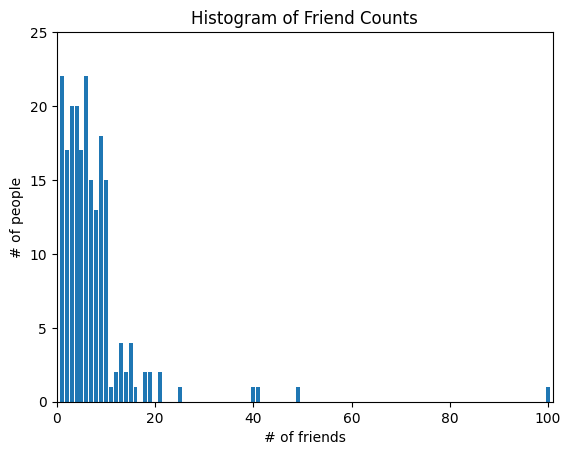

In [ ]:
friend_counts = Counter(num_friends)
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
# plt.show()

Text(0, 0.5, '# of people')

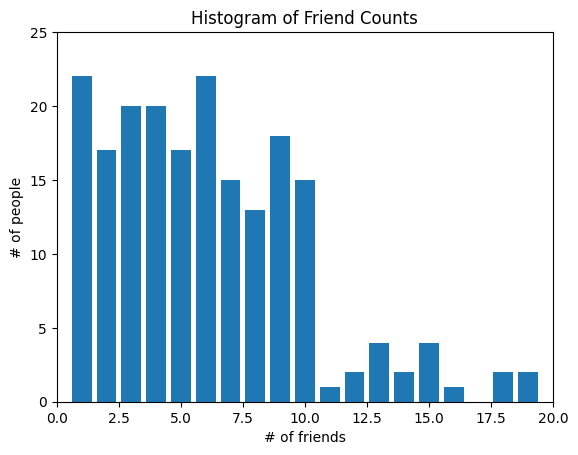

In [ ]:
friend_counts = Counter(num_friends)
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 20, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
# plt.show()

In [ ]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    print(counts)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

assert set(mode(num_friends)) == {1, 6}

mode(num_friends)

Counter({6: 22, 1: 22, 4: 20, 3: 20, 9: 18, 5: 17, 2: 17, 10: 15, 7: 15, 8: 13, 15: 4, 13: 4, 21: 2, 19: 2, 18: 2, 14: 2, 12: 2, 100.0: 1, 49: 1, 41: 1, 40: 1, 25: 1, 16: 1, 11: 1})
Counter({6: 22, 1: 22, 4: 20, 3: 20, 9: 18, 5: 17, 2: 17, 10: 15, 7: 15, 8: 13, 15: 4, 13: 4, 21: 2, 19: 2, 18: 2, 14: 2, 12: 2, 100.0: 1, 49: 1, 41: 1, 40: 1, 25: 1, 16: 1, 11: 1})


[6, 1]

# Data Range

Difference between the largest and smallest elements in your dataset

In [ ]:
# "range" already means something in Python, so we'll use a different name
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) == 99

# Variance

Range is not a good measure of dispersion.

Variance: Squared deviation of the mean is a good measure of dispersion

# Population Variance
$$\sigma^2 = \frac{1}{N}\sum_{i=1}^{N} (x_i - \mu)^2$$


# Sample Variance
$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n} (x_i - \bar{x})^2$$

# Functions, so far

* median
  * `_median_odd`
  * `_median_even`
* mode
* `de_mean`
* `variance`

In [ ]:
from scratch.linear_algebra import sum_of_squares

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

assert 81.54 < variance(num_friends) < 81.55



# Why `n-1` instead of `n`

Link: https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation

In [ ]:
import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04

def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 6

# Population Standard Deviation (SD)

Latex breaks in COLAB
<!-- $$\sigma = \sqrt{ \frac{1}{N}\sum_{i=1}^{N} (x_i - \mu)^2 }$$

or

$$
\sigma = \left(\frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2\right)^{1/2}
$$ -->




In [ ]:
from IPython.display import Math

Math(r"\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2}")

<IPython.core.display.Math object>

# Sample Standard Deviation


In [ ]:
Math(r"\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i - \mu)^2}")

<IPython.core.display.Math object>

# Units

* units of `friends` = range  
* Variance units are square of original units (e.g., friends-squared)
* So, we use Standard Deviation ($\sqrt{\text{Var}}$)

# Covariance

In [ ]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,
                 41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,
                 41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,
                 23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,
                 27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,
                 25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,
                 35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,
                 28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,
                 44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,
                 31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,
                 35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,
                 14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,
                 18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,
                 33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,
                 28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,
                 14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,
                 29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,
                 33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,
                 35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,
                 33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,
                 15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,
                 27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]


In [ ]:
from scratch.linear_algebra import dot

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

# Correlation

# Assumption:

Amount of time people spend on the site is related to the number of friends they have on the site. How can we verify this?

* `num_friends`: number of friends each user has. Each user starting from index 0 (sort of take that as his id)
* `daily_minutes`: how many minutes per day each user spends on the site
* both the above two variables orders are the same

Correlation: Two things can happen together
Causation: One thing causses other or one thing makes the other happen

Correlation is not Causation:
* If two things (x and y) move together - when one goes up, and the other goes up or down, that does not automatically mean one is causing the other

Several possibilities exist when x and y are correlated:

* x causes y
  * More hours studies --> higher test scores
* y causes x
  * Higher stress --> less sleep or less sleep --> higher stress
* x and y cause each other
  * Conf. and Performance can boose each other over time
* A third factor causes both
  * ice cream sales to go up
  * Drowning incidents to go up
    * icecream doesnt cause drowning; both are caused by heat
* It is just a coincidence or bad data



# Key points
* All causal relationships will usually show some correlation
* Not all correlations are causal

Testing the theory, *The amount of time people spend on the site is related to the number of friends they have on the site*

* Correlation is unitless (lies between -1 (anticorrelation) and 1 (perfect correlation)
  * Strong: 0.9; Weak 0.25

In [ ]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

print(len(daily_minutes), len(daily_hours))

204 204


# Let us consider the relationship between `num_friends` and `daily_minutes`

Observation: people with more friends "num_friends" on average spend more time on the site.

Possible explanations:
* More friends --> more time on site
  * Each frind posts content
  * More friends=more posts to read = more time onine
* More time on site --> more friends
  * Peoplw who spend time, meet more fridns and spand more time on the site
  * This eventually leads to more connections
* Third factor: passion for data science  
  * Passion increases both friends and makes someone spending more time on the site.


# To prove causation, one could run a randomized trials

In [ ]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

In [ ]:
correlation(num_friends, daily_minutes)

0.24736957366478227

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(len(num_friends))
len(daily_minutes)
df = pd.DataFrame(
    {"num_friends": num_friends, "daily_minutes": daily_minutes}
                  )


204


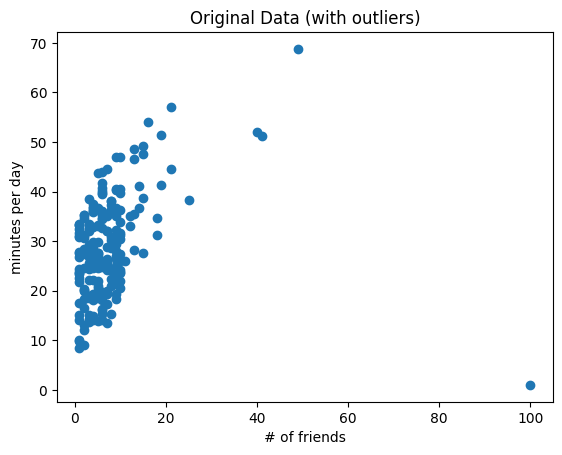

In [ ]:
plt.scatter(df["num_friends"], df['daily_minutes'])
plt.title("Original Data (with outliers)")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

Note that the person with 100 friends who spends only 1 minute per day on the site is an outlier. Note the correlation an be sensitive to outliers.

In [ ]:
outlier = num_friends.index(100)    # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58

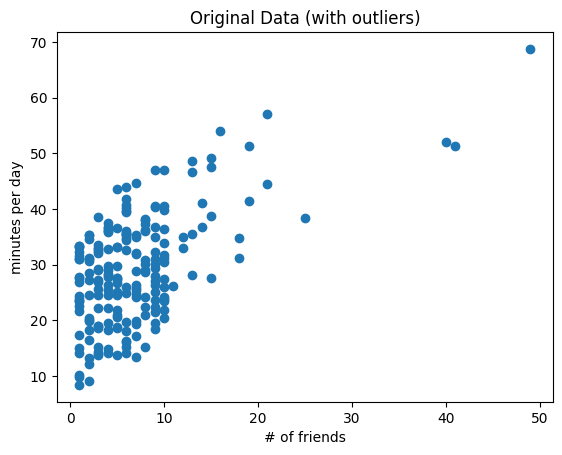

In [ ]:
df_g = pd.DataFrame(
    {"num_friends": num_friends_good, "daily_minutes": daily_minutes_good}
                  )

plt.scatter(df_g["num_friends"], df_g['daily_minutes'])
plt.title("Original Data (with outliers)")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

In [ ]:
correlation(df_g["num_friends"], df_g["daily_minutes"])

0.5736792115665601

Note that without the outlier, there is a strong correlation:

`~ 0.25 --> 0.57`

# A single extreme point carries huge leverage and can completely distort correlation and regression.

# Simpson's Paradox

Simple Example:
Two groups individually show a positive trend, but combined they show a negative trend.

We use study hours (x) and exam score (y) for two groups of students (Group A and Group B).
Each group has a positive relationship, but the groups themselves differ.


In [ ]:
import numpy as np
import pandas as pd

# Group A: low x, low y, positive trend
x_A = np.array([1, 2, 3, 4])
y_A = np.array([3, 4, 5, 6])  # slope +1

# Group B: high x, but lower y overall (shifted downward)
x_B = np.array([6, 7, 8, 9])
y_B = np.array([1, 2, 3, 4])  # also slope +1/2

df_A = pd.DataFrame({"group": "A", "x": x_A, "y": y_A})
df_B = pd.DataFrame({"group": "B", "x": x_B, "y": y_B})

df = pd.concat([df_A, df_B], ignore_index=True)

In [ ]:
df

,group,x,y
0,A,1,3
1,A,2,4
2,A,3,5
3,A,4,6
4,B,6,1
5,B,7,2
6,B,8,3
7,B,9,4


In [ ]:
df_A[["x", "y"]].corr()

,x,y
x,1.0,1.0
y,1.0,1.0


In [ ]:
df_B[["x", "y"]].corr()

,x,y
x,1.0,1.0
y,1.0,1.0


In [ ]:
df[["x", "y"]].corr()

,x,y
x,1.00000,-0.30429
y,-0.30429,1.00000


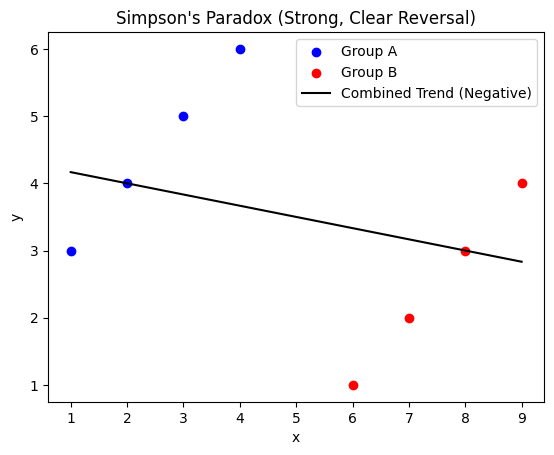

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_A["x"], df_A["y"], label="Group A", color="blue")
plt.scatter(df_B["x"], df_B["y"], label="Group B", color="red")

# Combined regression line
m, b = np.polyfit(df["x"], df["y"], 1)
x_line = np.linspace(df["x"].min(), df["x"].max(), 100)
plt.plot(x_line, m*x_line + b, color="black", label="Combined Trend (Negative)")

plt.title("Simpson's Paradox (Strong, Clear Reversal)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
print("Group A corr:\n", df_A[["x", "y"]].corr(), "\n")
print("Group B corr:\n", df_B[["x", "y"]].corr(), "\n")
print("Combined corr:\n", df[["x", "y"]].corr())

Group A corr:
      x    y
x  1.0  1.0
y  1.0  1.0 

Group B corr:
      x    y
x  1.0  1.0
y  1.0  1.0 

Combined corr:
          x        y
x  1.00000 -0.30429
y -0.30429  1.00000


Caveats for correlation:

* correlation of zero means there is no **linear** relationship between the two variables However there may be other sorts of relationships

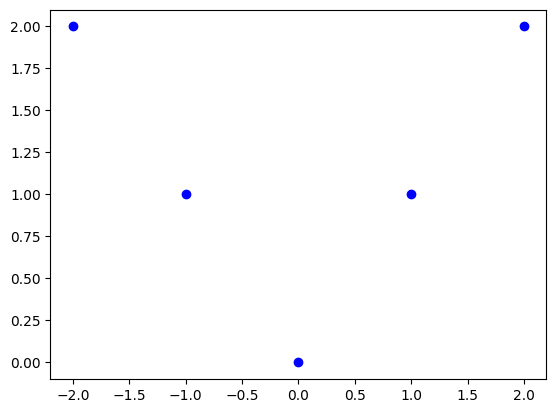

In [ ]:
# no linear relationship
x = [-2, -1, 0, 1, 2]
y = [ 2, 1, 0, 1, 2]
df_nolr = pd.DataFrame({"x":x, "y":y})
plt.scatter(df_nolr["x"], df_nolr["y"], color="blue")

In [ ]:
df_nolr.corr(),

(     x    y
 x  1.0  0.0
 y  0.0  1.0,)

# Correlation & Causation

Correlation measures how two variables move together

	•	Positive correlation → Both increase together
	•	Negative correlation → One goes up, the other goes down
	•	Zero correlation → No linear association

🔹 Correlation is a mathematical relationship.

Causation

Causation means that one variable directly produces a change in another.

	•	X → Y
	•	Manipulating X changes Y

🔹 Causation is a real-world mechanism.

Why Correlation != Causation

Two variables may be correlated because of:

* Coincidence
* A third hidden variable (confounder)
* Reverse direction
* indirect relationships


Example1: Ice cream sales and drowning deaths

* Correlation: High
* Causation: None
* Hidden variable: Temperature

More people buy ice create and go swimming in summer

Example2: More firefighters --> Bigger fires

* Correlation: postive
* Cause: bigger fires attract more firefighters, not vice versa

```
Fire size --> # of firefighters
Not Firefighters --> Fire size
```

Ice cream vs Drowning: High Correlation; But they are only correlated because both depend on Temperature

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Hidden confounder: temperature
np.random.seed(0)

temp = np.random.uniform(60, 100, 50)
ice_cream = temp * 1.2 + np.random.normal(0, 2, 50)
drowning = temp * 0.8 + np.random.normal(0, 1.5, 50)

df = pd.DataFrame({"temp": temp, "ice": ice_cream, "drown": drowning})

print(df[["ice", "drown"]].corr())

            ice     drown
ice    1.000000  0.976024
drown  0.976024  1.000000


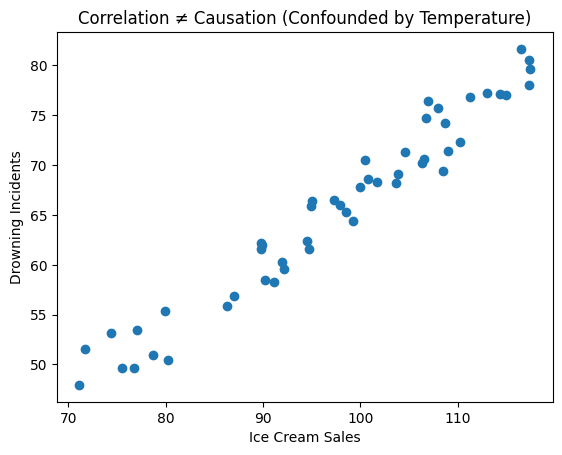

In [ ]:
plt.scatter(df["ice"], df["drown"])
plt.xlabel("Ice Cream Sales")
plt.ylabel("Drowning Incidents")
plt.title("Correlation ≠ Causation (Confounded by Temperature)")
plt.show()